# Getting Started Code for [F1 Car Rotation](https://www.aicrowd.com/challenges/f1rotation) on AIcrowd

## Download Necessary Packages 📚

In [1]:
!pip install --upgrade fastai 
!pip install aicrowd-cli

     |████████████████████████████████| 194 kB 423 kB/s 
     |████████████████████████████████| 17.4 MB 5.9 MB/s 
     |████████████████████████████████| 804.1 MB 2.1 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.1
    Uninstalling torchvision-0.8.1:
      Successfully uninstalled torchvision-0.8.1
  Attempting uninstall: fastai
    Found existing installation: fastai 2.3.0
    Uninstalling fastai-2.3.0:
      Successfully uninstalled fastai-2.3.0
     |████████████████████████████████| 51 kB 155 kB/s 
     |████████████████████████████████| 54 kB 703 kB/s 
     |████████████████████████████████| 201 kB 1.2 MB/s 
     |████████████████████████████████| 51 kB 2.3 MB/s 


## Download Data ⏬
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [2]:
API_KEY = '9cce69d6577e95bdcfaf107bb38f8ff2' #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
!aicrowd dataset download --challenge f1-car-rotation -j 3 

train.csv: 100%|██████████████████████████████| 449k/449k [00:00<00:00, 703kB/s]
sample_submission.csv: 100%|██████████████████| 104k/104k [00:00<00:00, 333kB/s]
test.zip:   1%|▎                            | 1.05M/111M [00:00<01:28, 1.24MB/s]
test.zip:   2%|▌                            | 2.10M/111M [00:00<00:44, 2.43MB/s]
val.csv: 100%|██████████████████████████████| 40.9k/40.9k [00:00<00:00, 271kB/s]
test.zip:   8%|██▏                          | 8.39M/111M [00:02<00:22, 4.47MB/s]
test.zip:  12%|███▌                         | 13.6M/111M [00:02<00:13, 7.37MB/s]

val.zip:   0%|                                      | 0.00/44.4M [00:00<?, ?B/s]
train.zip:   0%|                            | 1.05M/444M [00:00<05:56, 1.24MB/s]
train.zip:   0%|▏                           | 2.10M/444M [00:00<03:01, 2.43MB/s]
train.zip:   1%|▎                           | 4.19M/444M [00:01<01:26, 5.07MB/s]
train.zip:   1%|▍                           | 6.29M/444M [00:01<00:56, 7.75MB/s]

val.zip:   2%|▋           

Below, we create a new directory to put our downloaded data! 🏎

We unzip the ZIP files and move the CSVs.

In [4]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Archive:  train.zip
  inflating: data/train/0.jpg        
  inflating: data/train/1.jpg        
  inflating: data/train/10.jpg       
  inflating: data/train/100.jpg      
  inflating: data/train/1000.jpg     
  inflating: data/train/10000.jpg    
  inflating: data/train/10001.jpg    
  inflating: data/train/10002.jpg    
  inflating: data/train/10003.jpg    
  inflating: data/train/10004.jpg    
  inflating: data/train/10005.jpg    
  inflating: data/train/10006.jpg    
  inflating: data/train/10007.jpg    
  inflating: data/train/10008.jpg    
  inflating: data/train/10009.jpg    
  inflating: data/train/1001.jpg     
  inflating: data/train/10010.jpg    
  inflating: data/train/10011.jpg    
  inflating: data/train/10012.jpg    
  inflating: data/train/270.jpg      
  inflating: data/train/2700.jpg     
  inflating: data/train/27000.jpg    
  inflating: data/train/27001.jpg    
  inflating: data/train/27002.jpg    
  inflating: data/train/27003.jpg    
  inflating: data/train/27004.

In [5]:
!rm ./test.zip
!rm ./val.zip
!rm ./train.zip


## Import packages 📦

Below, we create a new directory to put our downloaded data! 🏎

We unzip the ZIP files and move the CSVs.

In [6]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [7]:
data_folder = "data"

In [8]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))
val_df = pd.read_csv(os.path.join(data_folder, "val.csv"))

## Visualize the data 👀

Using Pandas and the Matplot Library in Python, we will be viewing the images in our datasets.

In [9]:
train_df['label'].value_counts()

left     15042
front    10046
right     9913
back      4999
Name: label, dtype: int64

In [10]:
val_df['label'].value_counts()

left     1478
front    1029
right     976
back      517
Name: label, dtype: int64

Adding .jpg to all the ImageIDs in "ImageID" column. This will help us with adding the path behind the names of these images.

In [11]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

ImageID  label
0          0.jpg  right
1          1.jpg   left
2          2.jpg   left
3          3.jpg  right
4          4.jpg  right
...          ...    ...
39995  39995.jpg  right
39996  39996.jpg  right
39997  39997.jpg  right
39998  39998.jpg  right
39999  39999.jpg   left

[40000 rows x 2 columns]

In [12]:
val_df['ImageID'] = val_df['ImageID']+40000
val_df['ImageID'] = val_df['ImageID'].astype(str)+".jpg"
val_df

ImageID  label
0     40000.jpg  front
1     40001.jpg   back
2     40002.jpg  right
3     40003.jpg   left
4     40004.jpg  front
...         ...    ...
3995  43995.jpg   left
3996  43996.jpg   left
3997  43997.jpg   left
3998  43998.jpg  front
3999  43999.jpg  right

[4000 rows x 2 columns]

In [13]:
from tqdm import tqdm

dir_ = "data/val"
for i in tqdm(os.listdir(dir_)):
    os.rename(os.path.join(dir_,i),os.path.join(dir_,str(int(i.split(".")[0])+40000))+".jpg")
    

100%|██████████| 4000/4000 [00:00<00:00, 47829.68it/s]


In [14]:
val_df['is_valid'] = True
train_df['is_valid'] = False
df = pd.concat([train_df,val_df])

In [15]:
!cp -r ./data/val/. ./data/train/.

In [16]:
len(os.listdir("./data/train"))

44000

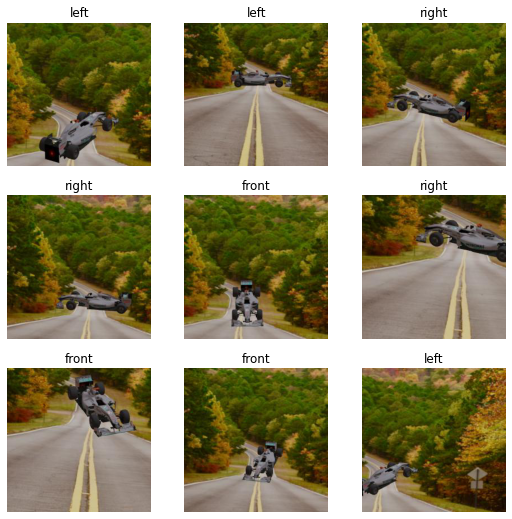

In [17]:
dls = ImageDataLoaders.from_df(df, path=os.path.join(data_folder, "train"), valid_col='is_valid', bs=16)

# Defining a function to take a look at the images
dls.show_batch()

# TRAINING PHASE 🏋️
Now that we have the dataset is ready, it's time to create a model that we will train on our data!

In [18]:
#models.resnet50
learn = cnn_learner(dls, models.vgg19_bn ,metrics=F1Score(average="weighted") ) 

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

## Train the Model 🏃🏽‍♂️

In [19]:
learn.fine_tune(6)

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.

## Load Test Set

Load the test data on which final submission is to be made.

In [20]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)

# Convert categorical values into label names
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'back', 1: 'front', 2: 'left', 3: 'right'}


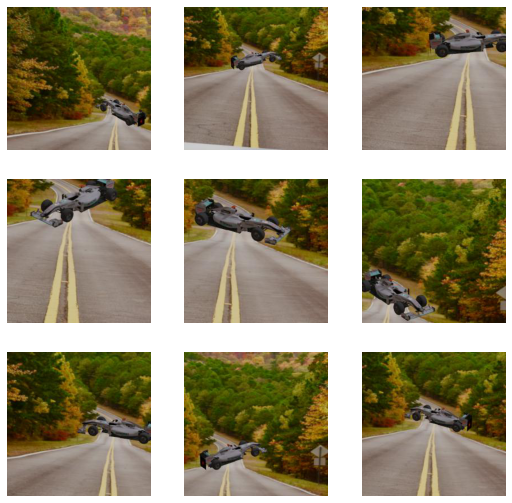

In [21]:
test_dls.show_batch()

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [22]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

## Save the prediction to csv

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [23]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

ImageID  label
0       7541   back
1       7963   left
2       2674   left
3       1089  front
4       7641   left
...      ...    ...
9995    7790   left
9996    7769  front
9997    4031  right
9998    6013   back
9999     369   left

[10000 rows x 2 columns]

In [24]:
submission.to_csv("submission.csv", index=False)

## Making Direct Submission thought Aicrowd CLI

In [25]:
!aicrowd submission create -c f1-car-rotation -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 105.6/103.9 KB • 345.1 kB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                 
                                                 │ Successfully submitted! │                                                 
                                                 ╰─────────────────────────╯                                                 
                                                       Important links                                                       
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-8/problems/f1-car-rotation/submissions/136535              │
│                  │                                                                                                        │
│  All submissions │ https://www.aicr